In [ ]:
# Import necessary libraries to manage the information
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import library of firebase
import firebase_admin
from firebase_admin import credentials, firestore

if not firebase_admin._apps:
    cred = credentials.Certificate('')
    firebase_admin.initialize_app(cred)

db = firestore.client()

## **Implementation Business Question JEFFERSON**

*What is the average number of effective app entries triggered by notifications of new discounts and promotions?*

This question is classified as Type 3 because it focuses on analyzing how often users open the app after receiving a notification about new discounts or promotions, we can understand how well these notifications capture users' attention and prompt them to interact with the app. A high average could indicate that notifications are well-targeted and relevant, motivating users to explore deals and engage with the app regularly. Conversely, a low average might suggest the need for more personalized or compelling notifications to enhance their impact and increase user retention.

Each time a new discount is added, users who have interacted with that store are notified. We track the number of notifications sent and the number of subsequent app entries. This data is stored, creating a record for each advertisement with its corresponding notification count and effective entry count.

After saving this information, we retrieve it from Firebase and use a pandas DataFrame to manage and process the records.

In [ ]:
# Instance of collection analytics business question 1
coleccion_analitics_business_question_3 = db.collection('AnalyticsBusinessQuestions').document('sprint3').collection('businessQuestion3')

# List of documents from the collection
docs = list(coleccion_analitics_business_question_3.stream())

# Transforme from firebase collection to pandas dataframe
data_df_analytics_business_question_3 = []
for doc in docs:
    data_dict_df_analytics_business_question_3 = doc.to_dict()
    data_dict_df_analytics_business_question_3['document_id'] = doc.id
    data_df_analytics_business_question_3.append(data_dict_df_analytics_business_question_3)

df_analytics_business_question_3 = pd.DataFrame(data_df_analytics_business_question_3)
df_analytics_business_question_3.head()

,notifications,advertisementId,entries,document_id
0,8,n7lUkKdgo4pwrrN3Cq39,3,3bA5QF65y4QcJHjmphnO
1,20,2AewV3d1A3L6SGIsXna3,5,CFGLw7jkZIYnvwAvQ6Z5
2,10,LgJTfAtnOdVfwsOKOETx,8,f8417uvZH5ZJd1ssOIqw


Next, we transform the data to calculate the minimum, maximum, and average of conversion rate. These statistics, along with the distribution of conversion rate, are then visualized in a plot.

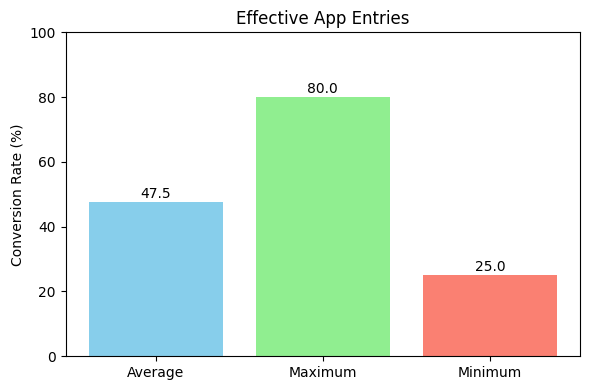

In [ ]:
# Calculate the average, maximum, and minimum conversion rate
df_analytics_business_question_3['conversion_rate'] = (df_analytics_business_question_3['entries'] / df_analytics_business_question_3['notifications']) * 100
conversion_avg = df_analytics_business_question_3['conversion_rate'].mean()
conversion_max = df_analytics_business_question_3['conversion_rate'].max()
conversion_min = df_analytics_business_question_3['conversion_rate'].min()

# Create a new DataFrame for the summary plot
summary_data = {
    'Metric': ['Average', 'Maximum', 'Minimum'],
    'Conversion Rate (%)': [conversion_avg, conversion_max, conversion_min]
}
df_summary = pd.DataFrame(summary_data)

# Plot the average, maximum, and minimum conversion rates
plt.figure(figsize=(6, 4))
bars = plt.bar(df_summary['Metric'], df_summary['Conversion Rate (%)'], color=['skyblue', 'lightgreen', 'salmon'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, round(yval, 2), ha='center', va='bottom')
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, 100)
plt.title("Effective App Entries")
plt.tight_layout()
plt.show()

## **Implementation Business Question ANDRES GARCIA**


This code snippet performs data analysis on a Firestore collection named card_analytics. It retrieves documents from the collection and extracts the 'tipo' field from each document, appending it to a list called types. The list is then converted into a Pandas DataFrame, with a column labeled 'Type'.

Next, the code calculates the frequency of each coupon type by counting occurrences of each unique type in the DataFrame. It then prints the frequency of each coupon type to the console.

Finally, the code creates a bar chart to visualize the frequency of the different coupon types. The chart is configured with a sky-blue color scheme and labeled axes for clarity, displaying the results in a graphical format.

This summary captures the key functionalities and outcomes of the code in a concise manner.


Frequency of each coupon type:
Type
Salud              20
Belleza            18
Viajes             18
Entretenimiento    15
Comida             14
Electrónica        14
Vestuario          11
Hogar              10
Name: count, dtype: int64


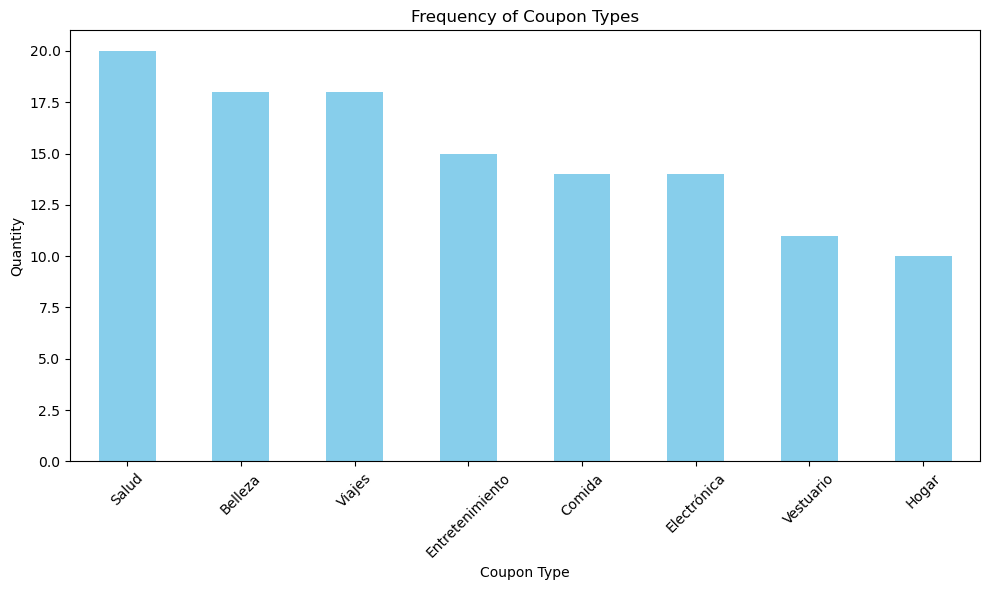

In [ ]:
# Define the collection
collection_name = 'card_analytics'

docs = db.collection(collection_name).stream()

types = []
for doc in docs:
    data = doc.to_dict()
    types.append(data.get('tipo', 'Unknown'))

df = pd.DataFrame(types, columns=['Type'])

type_frequency = df['Type'].value_counts()

print("\nFrequency of each coupon type:")
print(type_frequency)

# Create a bar chart
plt.figure(figsize=(10, 6))
type_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Implementation Business Question Sprint 3 Juan Serrano*


The business question, "What is the average number of people who shop in the stores on each day of the week?" focuses on understanding customer behavior patterns for different stores. This information is valuable for businesses, especially restaurants, as it enables them to predict peak days and times, helping reduce waste and optimize inventory. By providing insights into customer trends, we can encourage business owners to maintain their presence on the platform, benefiting from data-driven decision-making.

To answer this question, we will first collect all purchases made during the last week from the Firestore database. Each purchase record contains a reference to a loyalty card. Using this reference, we will retrieve the corresponding loyalty card to identify the associated store. Once the store information is obtained, we will extract relevant data such as the store name and category. This data will be used to calculate the average number of customers per store for each day of the week. The results will then be visualized through the following graphs:

Distribution of Purchases of Last Week: This graph will display the total purchases made on each day of the week across all stores.
Distribution of Purchases by Store Category: A breakdown of purchases based on store categories (e.g., Restaurant) for the last week.
Top 5 Businesses of Each Day: A ranked visualization of the top-performing businesses by the number of purchases for each day of the week.
These graphs will provide actionable insights for businesses, enabling them to optimize their operations based on customer behavior trends.

In [ ]:
import datetime
# Retrieve purchases made in the last week

end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=7)

purchases_ref = db.collection('purchases') 
purchases_query = purchases_ref.where('date', '>=', str(start_date)).where('date', '<=', str(end_date))
purchases_docs = purchases_query.stream()

purchases = []
for doc in purchases_docs:
    purchase_data = doc.to_dict()
    purchases.append({
        'date': purchase_data['date'],
        'loyaltyCardId': purchase_data['loyaltyCardId'],
    })



C:\Users\Master\AppData\Local\Temp\ipykernel_2868\1304846308.py:8: UserWarning: Detected filter using positional arguments. Prefer using the 'filter' keyword argument instead.
  purchases_query = purchases_ref.where('date', '>=', str(start_date)).where('date', '<=', str(end_date))


In [ ]:
# Get loyalty cards and map them to stores
loyalty_cards = {}
for purchase in purchases:
    loyalty_card_id = purchase['loyaltyCardId']
    if loyalty_card_id not in loyalty_cards:
        loyalty_card_doc = db.collection('loyaltyCards').document(loyalty_card_id).get()
        if loyalty_card_doc.exists:
            loyalty_card_data = loyalty_card_doc.to_dict()
            loyalty_cards[loyalty_card_id] = {
                'storeId': loyalty_card_data['storeId']
            }

In [ ]:
# Get store information
stores = {}
for loyalty_card in loyalty_cards.values():
    store_id = loyalty_card['storeId']
    if store_id not in stores:
        store_doc = db.collection('stores').document(store_id).get()
        if store_doc.exists:
            store_data = store_doc.to_dict()
            stores[store_id] = {
                'name': store_data['name'],
                'category': store_data['category']
            }

In [ ]:
# Process data to calculate insights

daywise_purchases = {day: [] for day in range(7)}  
category_purchases = {}
top_businesses_per_day = {day: {} for day in range(7)}

for purchase in purchases:
    date = datetime.datetime.strptime(purchase['date'], "%Y-%m-%d")
    day_of_week = date.weekday()
    loyalty_card_id = purchase['loyaltyCardId']
    
    if loyalty_card_id not in loyalty_cards:
        print(f"Warning: Loyalty card ID {loyalty_card_id} not found in Firestore. Skipping this purchase.")
        continue
    
    store_id = loyalty_cards[loyalty_card_id]['storeId']
    
    if store_id not in stores:
        print(f"Warning: Store ID {store_id} not found in Firestore. Skipping this purchase.")
        continue

    store_info = stores[store_id]

    daywise_purchases[day_of_week].append(store_id)

    category = store_info['category']
    if category not in category_purchases:
        category_purchases[category] = 0
    category_purchases[category] += 1

    if store_id not in top_businesses_per_day[day_of_week]:
        top_businesses_per_day[day_of_week][store_id] = 0
    top_businesses_per_day[day_of_week][store_id] += 1

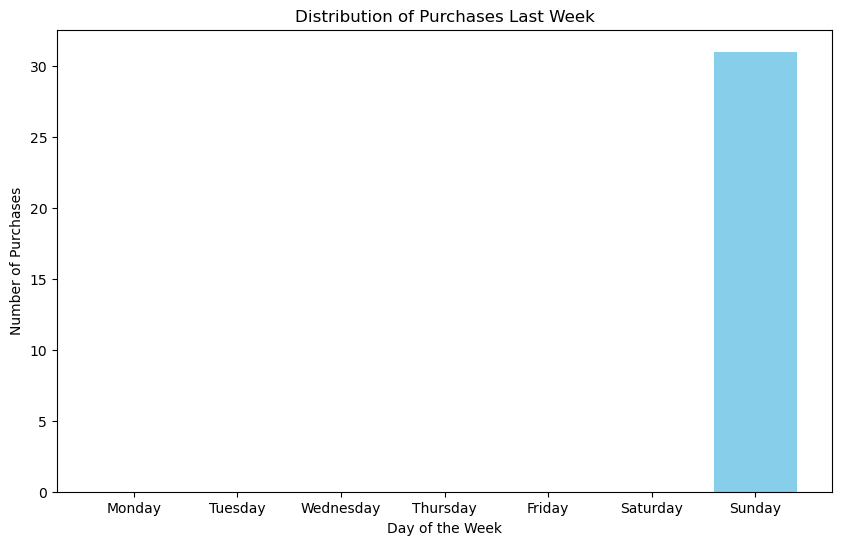

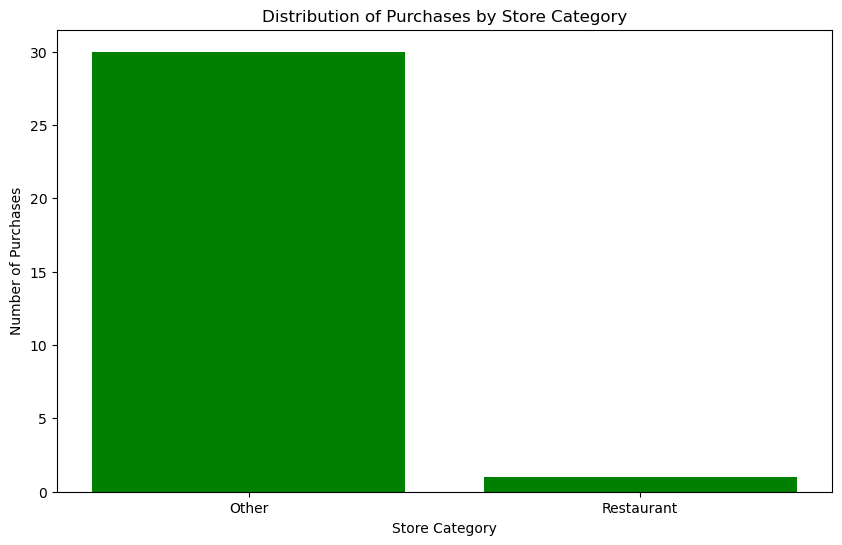

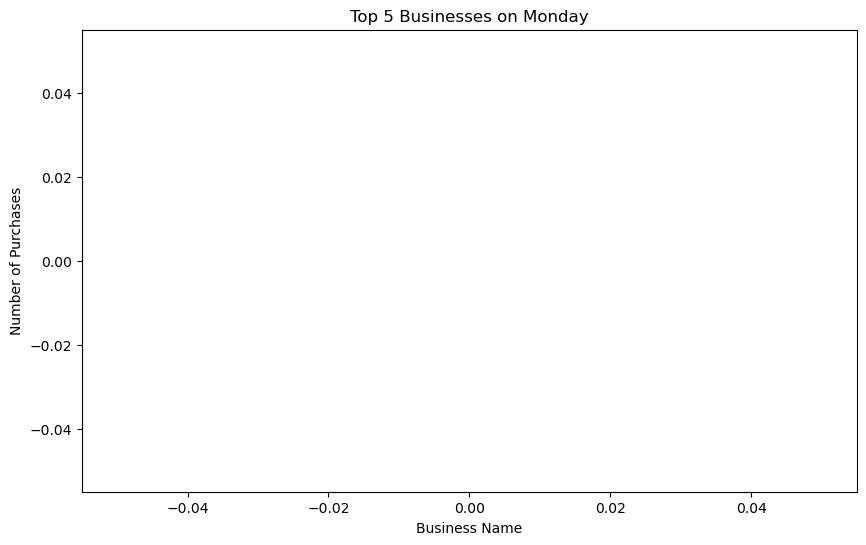

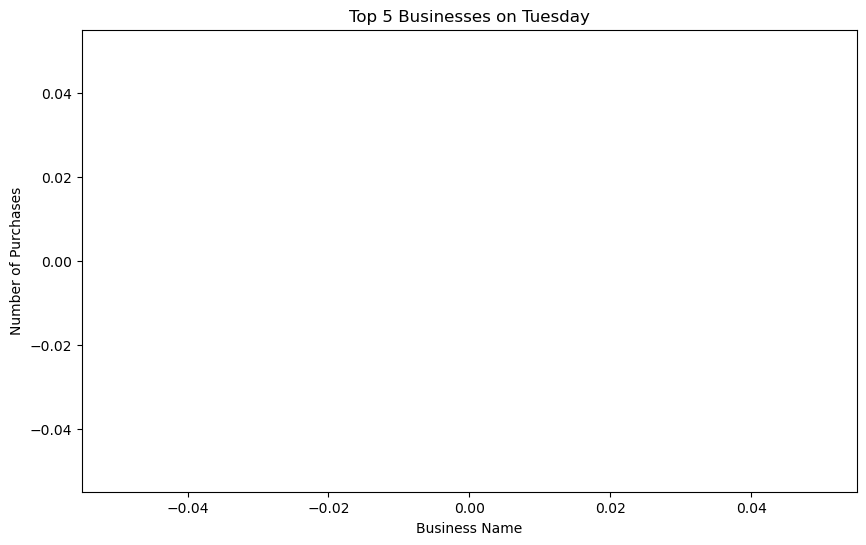

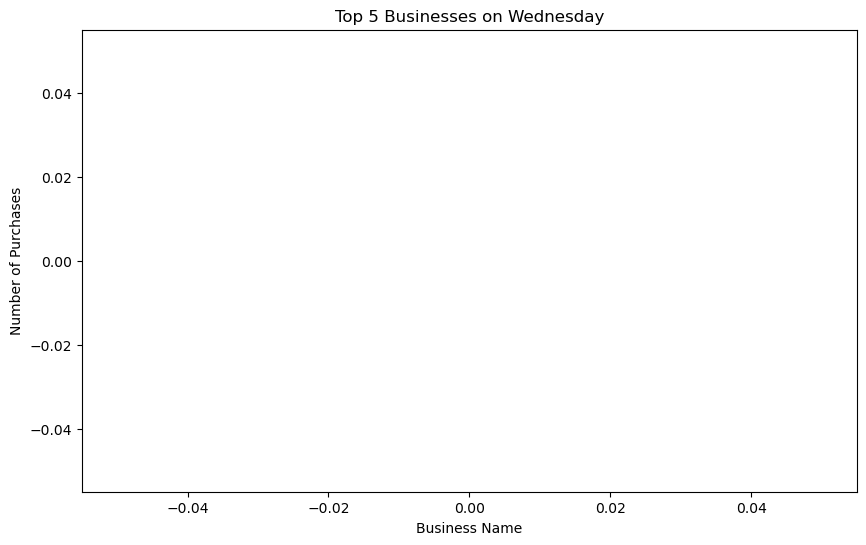

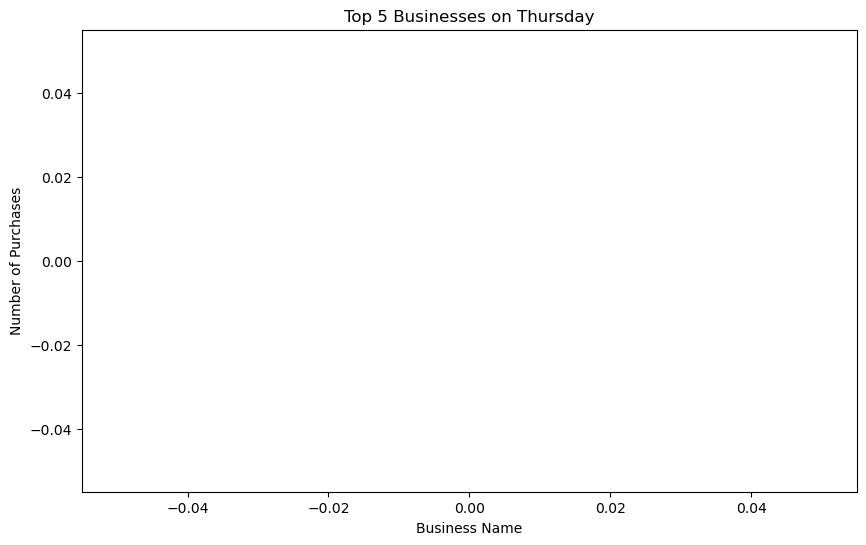

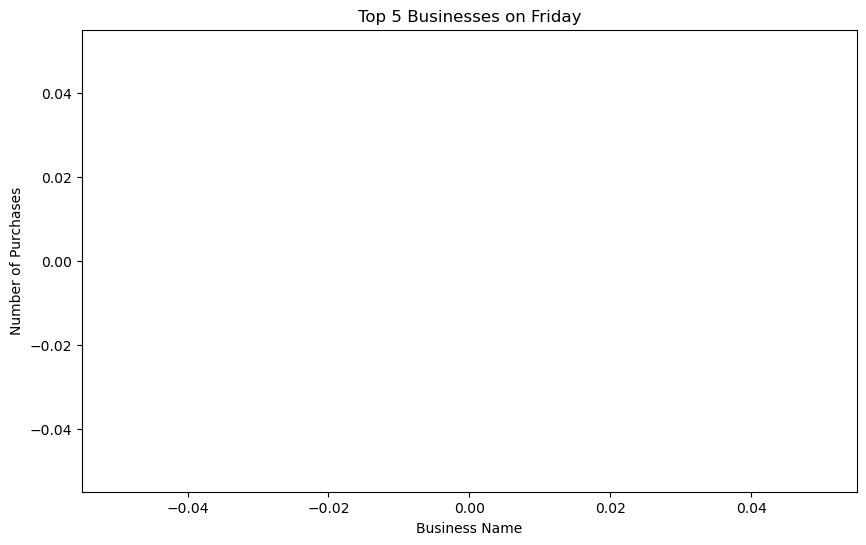

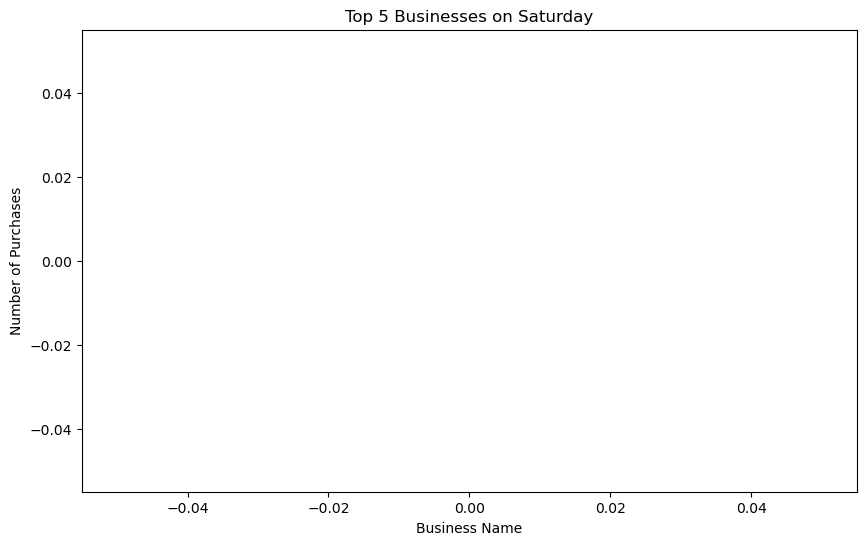

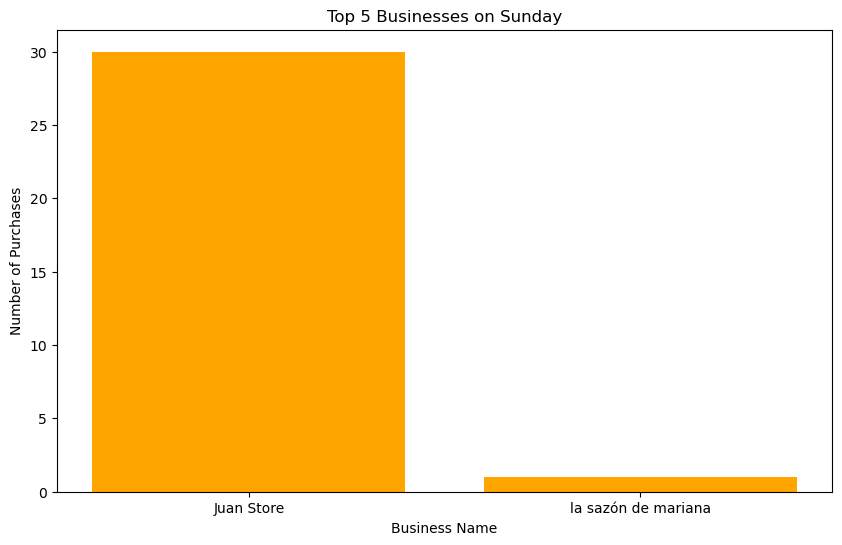

In [ ]:
#Visualize insights

# Graph 1: Distribution of purchases for last week
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
purchase_counts = [len(daywise_purchases[day]) for day in range(7)]

plt.figure(figsize=(10, 6))
plt.bar(days, purchase_counts, color='skyblue')
plt.title("Distribution of Purchases Last Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Purchases")
plt.show()

# Graph 2: Distribution of purchases by store category
categories = list(category_purchases.keys())
category_counts = list(category_purchases.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, category_counts, color='green')
plt.title("Distribution of Purchases by Store Category")
plt.xlabel("Store Category")
plt.ylabel("Number of Purchases")
plt.show()

# Graph 3: Top 5 businesses of each day
for day in range(7):
    top_businesses = sorted(top_businesses_per_day[day].items(), key=lambda x: x[1], reverse=True)[:5]
    business_names = [stores[store_id]['name'] for store_id, _ in top_businesses]
    business_counts = [count for _, count in top_businesses]

    plt.figure(figsize=(10, 6))
    plt.bar(business_names, business_counts, color='orange')
    plt.title(f"Top 5 Businesses on {days[day]}")
    plt.xlabel("Business Name")
    plt.ylabel("Number of Purchases")
    plt.show()